In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as display
import ipywidgets as widgets

from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit

import joblib

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset
df = pd.read_csv('data/titanic.csv')
df.shape

(891, 12)

In [3]:
# View top 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Dropping "PassengerId" feature
df.drop('PassengerId', axis=1, inplace=True)
df.shape

(891, 11)

In [6]:
# Check for missing value percentage
round((df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False), 2)

Cabin       77.10
Age         19.87
Embarked     0.22
Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
SibSp        0.00
Parch        0.00
Ticket       0.00
Fare         0.00
dtype: float64

## Missing Value Treatment

In [7]:
# Group by cabin
df.groupby(df.Cabin.isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

Survival rate is lower when `Cabin` is missing, so basically `Cabin` is not missing at random

In [8]:
# Create new feature "CabinIndicator", 0 -> mssing, 1 -> not missing
df['CabinIndicator'] = np.where(df.Cabin.isnull(), 0, 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinIndicator
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
# Dropping "Cabin" feature as we derived new feature out of it
df.drop('Cabin', axis=1, inplace=True)
df.shape

(891, 11)

In [10]:
# View statistical details of "Age" feature
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
# Fill missing value with mean
df.fillna(round(df.Age.mean(), 1), inplace=True)

<Figure size 432x288 with 0 Axes>

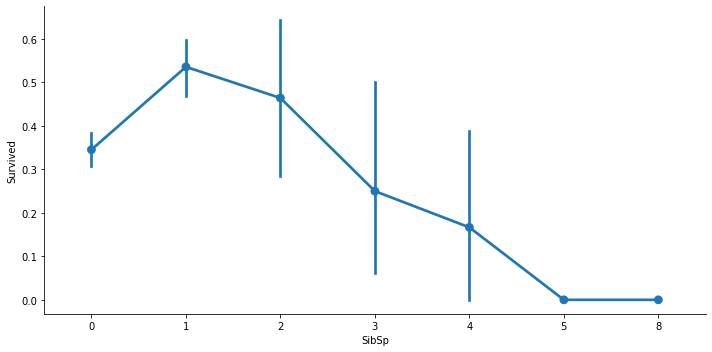

<Figure size 432x288 with 0 Axes>

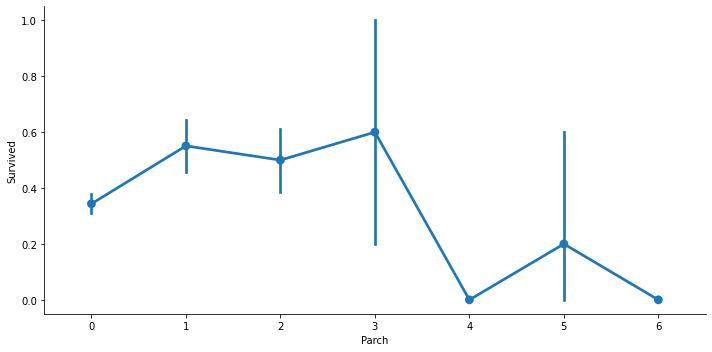

In [12]:
# Visualize "SibSp" & "Parch"
for index, feature in enumerate(['SibSp','Parch']):
    plt.figure(index)
    sns.catplot(x=feature, y='Survived', data=df, kind='point', aspect=2)
    plt.show()

In [13]:
# Combine "SibSp" & "Parch"
df['FamilyCount'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinIndicator,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [14]:
# Dropping "SibSp" & "Parch" features as we have derived new column out of it
df.drop(['SibSp','Parch'], axis=1, inplace=True)
df.shape

(891, 10)

### Categorical to Numeric Conversion

In [15]:
# Handle "Sex" feature, Male -> 0, Female -> 1
df.Sex = df.Sex.map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,CabinIndicator,FamilyCount
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,0,0


In [16]:
# Dropping non significant features
df.drop(['Embarked','Name','Ticket'], axis=1, inplace=True)
df.shape

(891, 7)

In [17]:
# View top 5 rows
df.head()

,Survived,Pclass,Sex,Age,Fare,CabinIndicator,FamilyCount
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Train-Test Split

In [18]:
# Get X & y 
X = df.drop('Survived', axis=1)
y = df['Survived']

In [19]:
# Perform split -> 60:40 (train:60, test:20, validation:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [20]:
# Verify the split 60:20:20
for data in [y_train, y_test, y_validation]:
    print(round(len(data)/len(y), 2))

0.6
0.2
0.2


In [21]:
# Create train, test & validation set files
X_train.to_csv('data/train_features.csv', index=False)
X_test.to_csv('data/test_features.csv', index=False)
X_validation.to_csv('data/validation_features.csv', index=False)
y_train.to_csv('data/train_labels.csv', index=False)
y_test.to_csv('data/test_labels.csv', index=False)
y_validation.to_csv('data/validation_labels.csv', index=False)

## Regression

`Regression` is a statistical process for estimating the relationships among variables, often to make a prediction about some outcome.

<u><b>Simple Linear Regression</b></u><br/>

${y}={mx} + {c}$

where,
* m = slope
* x = predictor feature (independent variable)
* y = target feature (dependent variable)

In [22]:
# Read rainfall dataset
rainfall_df = pd.read_excel('data/rainfall_umbrellas.xlsx')
rainfall_df.head()

,Month,Rainfall (mm),Umbrellas sold
0,Jan,82.0,15
1,Feb,92.5,25
2,Mar,83.2,17
3,Apr,97.7,28
4,May,131.9,41


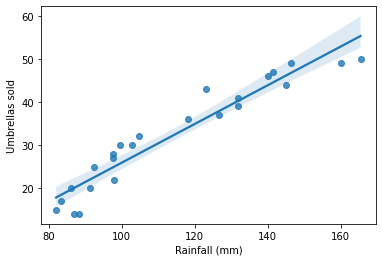

In [23]:
# Plotting regression plot for rainfall dataset
sns.regplot(data=rainfall_df, x="Rainfall (mm)", y="Umbrellas sold");

## Logistic Regression

`Logistic Regression` is a form of regression where the target variable is binary

<u><b>Logistic Regression</b></u><br/>

${y} = \frac{1}{e^{-({mx} + {c})}}$

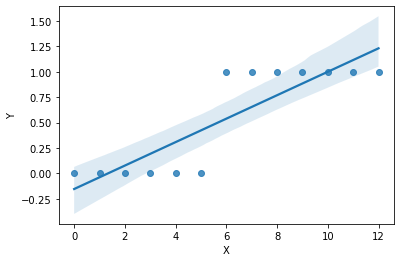

In [24]:
# Simple linear regression
log_reg_df = pd.DataFrame({'X': [0,1,2,3,4,5,6,7,8,9,10,11,12], 'Y': [0,0,0,0,0,0,1,1,1,1,1,1,1]})
sns.regplot(data=log_reg_df, x='X', y='Y');

In [25]:
# Define sigmoid function
def sigmoid(x, x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return y

In [26]:
# Create data
x_data = np.array([0.0,   1.0,  3.0, 4.3, 6.0, 7.0,   8.0,   8.5, 10.0, 12.0])
y_data = np.array([0.01, 0.02, 0.04, 0.11, 0.72, 0.43,  0.7, 0.89, 0.95, 0.99])

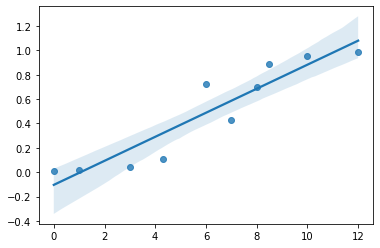

In [27]:
# Best fit line
sns.regplot(data=log_reg_df, x=x_data, y=y_data);

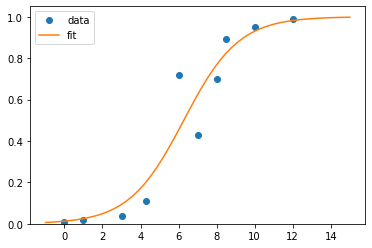

In [28]:
# Plot sigmoid line
popt, pcov = curve_fit(sigmoid, x_data, y_data)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x, y, label='fit')
plt.ylim(0, 1.05)
plt.legend(loc='best')
plt.show()

### When to use Logistic Regression

|When to Use It?| When Not to Use It?|
|---|---|
|binary traget variable|continuous target variable|
|transparency is important or interested in significance of predictors|massive data (rows or columns)|
|fairly well-behaved data|unwieldy data|
|need a quick initial benchmark|performance is the only thing that matters|

### Logistic Regression Hyperparameters

Import Logistic Regression from `sklearn`

In [29]:
# Import logistic regression module
from sklearn.linear_model import LogisticRegression
# print(dir(LogisticRegression()), end=', ')

**Important Point**

We will focus on `C` hyperparameter.

`C` hyperparameter is a regularization parameter in logistic regression that controls how closely the model fits to the training data.

`Regularization` is a technique used to reduce overfitting by discouraging overly complex models in some way.

Basically ${\lambda}$ is the hyperparameter,

${C} = \frac{1}{{\lambda}}$

${\lambda}{\Rightarrow}{0} = {C}{\Rightarrow}{\infty}$

low regularization ${\Rightarrow}$ high complexity ${\Rightarrow}$ more likely to overfit

In [30]:
# Import required package
from sklearn.model_selection import GridSearchCV

In [31]:
# Helper function to view results
def view_results(results):
    print(f'Best Parameters: {results.best_params_}\n')
    mean_test_scores = results.cv_results_['mean_test_score']
    std_test_scores = results.cv_results_['std_test_score']
    for mean, std, parameters in zip(mean_test_scores, std_test_scores, results.cv_results_['params']):
        print(f"{round(mean,3)} (+/-{round(std*2,3)}) for {parameters}")

In [32]:
# Create logistic regression object
lr = LogisticRegression()

In [33]:
# Define grid search parameters
grid_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [34]:
# Perform grid search
grid_search = GridSearchCV(lr, grid_parameters, cv=5)
grid_search.fit(X_train, y_train.values.ravel())
view_results(grid_search)

Best Parameters: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


In [35]:
# View best estimator
grid_search.best_estimator_

LogisticRegression(C=1)

In [36]:
# View best score
grid_search.best_score_

0.7997178628107917

In [37]:
# Store best model as pickle file
joblib.dump(grid_search.best_estimator_, 'data/models/LR_Model.pkl')

['data/models/LR_Model.pkl']

## Support Vector Machine

A `Support Vector Machine` is a classifier that finds an optimal hyperplane that maximizes the margin between two classes.

In [38]:
# SVM intution
image_1 = open('images/svm-intution.png','rb').read()
widget_1 = widgets.Image(value=image_1, format='jpg', width=300, height=400)
image_2 =open('images/svm-algo.png','rb').read()
widget_2 = widgets.Image(value=image_2, format='jpg', width=300, height=400)
widget_final = widgets.HBox([widget_1, widget_2])
display.display(widget_final)

<img src='images/svm-hyperplane.png' width=600 height=800 align='left'/>

The `kernel trick (or kernel method)` transforms data that is not linearly seperable in n-dimensional space to a higher dimension where it is linearly seperable.

<img src='images/svm-kernel-trick.png' width=600 height=800 align='left'/>

### When to use SVM

|When to Use It?| When Not to Use It?|
|---|---|
|binary traget variable|feature-to-row ratio is very low|
|feature-to-row ratio is very high|transparency is important or interested in significance of predictors|
|very complex relationships|looking for a quick benchmark model|
|data with lots of outliers||

### SVM Hyperparameters

Import Support Vector Machines from `sklearn`

In [39]:
# Importing SVM module
from sklearn.svm import SVC
# print(dir(SVC()), end=', ')

**How value of `C` hyperparameter impact model?**

<img src='images/svm-hyperparameter.png' width=600 height=800 align='left'/>

**Important Points**

We will focus on two hyperparameters, `C` & `kernel`.

In [40]:
# Define SVC object
svc = SVC()

In [41]:
# Define grid search parameters
grid_params = {
    'kernel': ['linear','rbf'],
    'C': [0.1, 1, 10]
}

In [42]:
# Read train dataset
X_train = pd.read_csv('data/train_features.csv')
y_train = pd.read_csv('data/train_labels.csv')

In [43]:
# Perform grid search
grid_search = GridSearchCV(svc, grid_params, cv=5)
grid_search.fit(X_train, y_train.values.ravel())
view_results(grid_search)

Best Parameters: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [44]:
# View best estimator
grid_search.best_estimator_

SVC(C=0.1, kernel='linear')

In [45]:
# View best score
grid_search.best_score_

0.7959619114794568

In [46]:
# Store best model as pickle file
joblib.dump(grid_search.best_estimator_, 'data/models/SVM_Model.pkl')

['data/models/SVM_Model.pkl']

## Multilayer Perceptron

A `multilayer perceptron` is a classic feed-forward artifical neural network, the core component of deep learning.

**Alternatively:** A `multilayer perceptron` is a connected series of nodes (in the form of a directed acyclic graph), where each node represents a function or a model.

<img src='images/perceptron.png' width=600 height=800 align='left'/>

### When to use Multilayer Perceptron

|When to Use It?| When Not to Use It?|
|---|---|
|categorical or continuous traget variable|image recognition, time series, etc.|
|very complex relationships or performance is the only thing that matters|transparency is important or interested in significance of predictors|
|when control over the training process is very important|need a quick benchmark model|
||very limited data available|

### Multilayer Perceptron Hyperparameters

Import `MLPClassifier` and `MLPRegressor` from `sklearn`

In [47]:
# Importing multilayer perceptron modules
from sklearn.neural_network import MLPClassifier, MLPRegressor
# print(dir(MLPClassifier))
# print(dir(MLPRegressor))

The `hidden layer-size` hyperparameter determines how many hidden layers there will be and how many nodes in each layer.

The `activation function` hyperparameter dictates the type of nonlinearity that is introduced to the model.

* TanH - Hyperbolic Tangent Curve
* ReLU - Rectified Linear Unit

<img src='images/activation-function.png' width=700 height=800 align='left'></img>

The `learning rate` hyperparameter facilitates both how quickly and whether or not the algorithm will find the optimal solution.

**Note:** Small learning rate will not work in case of local minima.

<img src='images/learning-rate.png' width=400 height=800 align='left'></img>

In [48]:
# Create MLP classifier object
mlp_classifier = MLPClassifier()

In [49]:
# Create grid search parameters
grid_params = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [50]:
# Read train dataset
X_train = pd.read_csv('data/train_features.csv')
y_train = pd.read_csv('data/train_labels.csv')

In [51]:
# Perform grid search
grid_search = GridSearchCV(mlp_classifier, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train.values.ravel())
view_results(grid_search)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.712 (+/-0.115) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.762 (+/-0.096) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.702 (+/-0.056) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.764 (+/-0.14) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.781 (+/-0.13) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.792 (+/-0.093) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.796 (+/-0.107) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.805 (+/-0.114) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.772 (+/-0.13

In [52]:
# View best estimator
grid_search.best_estimator_

MLPClassifier(learning_rate='invscaling')

In [53]:
# View best score
grid_search.best_score_

0.8053077058719802

In [54]:
# Store best model as pickle file
joblib.dump(grid_search.best_estimator_, 'data/models/MLP_Model.pkl')

['data/models/MLP_Model.pkl']

## Random Forest

A `random forest` merges a collection of independent decision trees to get a more accurate and stable prediction.

Type of `ensemnle method` (combine several machine learning models in order to decrease both bias and variance).

<img src='images/random-forest-working.png' width=500 height=800 align='left'></img>

Making prediction on test set,

<img src='images/random-forest-prediction.png' width=500 height=800 align='left'></img>

### When to use Random Forest

|When to Use It?| When Not to Use It?|
|---|---|
|categorical or continuous traget variable|if we are solving a very complex, novel problem|
|interested in significance of predictors|transparency is important|
|need a quick benchmark model|prediction time is important|
|if we have messy data, such as missing vakues, outliers||

### Random Forest Hyperparameters

Import `RandomForestClassifier` and `RandomForestRegressor` from `sklearn`

In [55]:
# Importing required modules
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# print(dir(RandomForestClassifier))
# print(dir(RandomForestRegressor))

The `n_estimators` hyperparameter controls how many individual decision trees will be built.

The `max_depth` hyperparameter controls how deep each individual decision tree can go.

<img src='images/random-forest-hyperparameter.png' width=500 height=800 align='left'></img>

In [56]:
# Create random forest classifier object
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

In [57]:
# Create grid search parameters
grid_params = {
    'n_estimators': [5, 50, 250],
    'min_samples_leaf': [5, 10, 20, 50, 100, 200],
    'max_depth': [2, 4, 8, 16, 32, None]
}

In [58]:
# Read train dataset
X_train = pd.read_csv('data/train_features.csv')
y_train = pd.read_csv('data/train_labels.csv')

In [59]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, 
                           param_grid=grid_params, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=1,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)
view_results(grid_search)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 16, 'min_samples_leaf': 5, 'n_estimators': 5}

0.758 (+/-0.077) for {'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 5}
0.8 (+/-0.118) for {'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 50}
0.805 (+/-0.12) for {'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 250}
0.755 (+/-0.08) for {'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 5}
0.794 (+/-0.121) for {'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 50}
0.8 (+/-0.122) for {'max_depth': 2, 'min_samples_leaf': 10, 'n_estimators': 250}
0.747 (+/-0.092) for {'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 5}
0.781 (+/-0.111) for {'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 50}
0.785 (+/-0.119) for {'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 250}
0.738 (+/-0.084) for {'max_depth': 2, 'min_samples_leaf': 50, 'n_estimators': 5}
0.772 (+/-0.121) for {'max_depth': 2, 'min_sample

In [60]:
# View best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=16, min_samples_leaf=5, n_estimators=5,
                       n_jobs=-1, random_state=42)

In [61]:
# View best score
grid_search.best_score_

0.8296596720155176

In [62]:
# Store best model as pickle file
joblib.dump(grid_search.best_estimator_, 'data/models/RF_Model.pkl')

['data/models/RF_Model.pkl']

## Boosting

`Boosting` is an ensemble method that aggregates a number of weak models to create one strong model.

A `weak model` is one that is only slightly better than random guessing.

A `strong model` is one that is strongly correlated with the true classification.

`Boosting` effectively learns from its mistakes with each iteration.



**Random Forest vs Boosting**

The difference between random forest and boosting is that each individual model or decision tree in random forest was built independently. Each tree did not know what any of the other trees were doing. 

That is not the case with boosting. In boosting, each successive model learns from the mistakes of the ones before it so they're not independent.

<img src='images/boosting-intution.png' width=650 height=800 align='left'></img>

Making prediction on test set,

<img src='images/boosting-prediction.png' width=500 height=800 align='left'></img>

### When to use Boosting

|When to Use It?| When Not to Use It?|
|---|---|
|categorical or continuous traget variable|transparency is important|
|useful on nearly any type of problem|training time is important or compute power is limited|
|interested in significance of predictors|data is really noisy|
|prediction time is important||

### Boosting Hyperparameters

Import `GradientBoostingClassifier` and `GradientBoostingRegressor` from `sklearn`

In [63]:
# Importing boosting modules
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# print(dir(GradientBoostingClassifier()))
# print(dir(GradientBoostingRegressor()))

In [64]:
# Create gradient boosting classifer object
gb_classifier = GradientBoostingClassifier()

In [65]:
# Create grid search parameters
grid_params = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

In [66]:
# Read train dataset
X_train = pd.read_csv('data/train_features.csv')
y_train = pd.read_csv('data/train_labels.csv')

In [67]:
# Perform grid search
grid_search = GridSearchCV(gb_classifier, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train.values.ravel())
view_results(grid_search)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.82 (+/-0.051) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max

In [68]:
# View best estimator
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [69]:
# View best score
grid_search.best_score_

0.8408569917122201

In [70]:
# Store best model as pickle file
joblib.dump(grid_search.best_estimator_, 'data/models/GB_Model.pkl')

['data/models/GB_Model.pkl']

## Best Model - Underlaying Questions

|Accuracy| Latency|
|---|---|
|how do they handle data of different sizes, such as short and fat, long, skinny?|how long will it take to train?|
|how will they handle the complexity of feature relationship?|how long will it take to predict?|
|how will they handle messy data?||


#### Conceptual Comparison of Algorithms

|Algorithm|Problem Type|Train Speed|Predict Speed|Interpretability|Performance|Performance with Limited Data|
|---|---|---|---|---|---|---|
|Logistic Regrerssion|Classification|Fast|Fast|Medium|Lower|Higher|
|Support Vector Machine|Classification|Slow|Moderate|Low|Medium|Higher|
|Multilayer Perceptron|Both|Slow|Moderate|Low|High|Lower|
|Random Forest|Both|Moderate|Moderate|Low|Medium|Lower|
|Boosted Trees|Both|Slow|Fast|Low|High|Lower|

## Final Model Selection

In [71]:
# Importing required modules
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [72]:
# Load all models
models = {}
for model in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[model] = joblib.load(f'data/models/{model}_Model.pkl')
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(learning_rate='invscaling'),
 'RF': RandomForestClassifier(max_depth=16, min_samples_leaf=5, n_estimators=5,
                        n_jobs=-1, random_state=42),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)}

### Performance Evaluation Metrics

${Accuracy} = \frac{number predicted correctly}{total numbers of examples}$

${Precision} = \frac{number predicted as surviving that actually survived}{total numbers predicted to survive}$

${Recall} = \frac{number predicted as surviving that actually survivied}{total numbers that actually survived}$

In [73]:
# Helper function to evaluate models
def evaluate_model(name, model, features, labels):
    # make prediction
    start_time = time()
    pred = model.predict(features)
    end_time = time()
    
    # compute evaluation metrics
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    time_taken = round(end_time - start_time, 4)
    print(f'{name} -- Accuracy: {accuracy} | Precision: {precision} | Recall: {recall} | Latency: {time_taken}ms')

In [74]:
# Evaluate models on validation set
for name, model in models.items():
    evaluate_model(name, model, X_validation, y_validation)

LR -- Accuracy: 0.775 | Precision: 0.712 | Recall: 0.646 | Latency: 0.002ms
SVM -- Accuracy: 0.747 | Precision: 0.672 | Recall: 0.6 | Latency: 0.002ms
MLP -- Accuracy: 0.775 | Precision: 0.692 | Recall: 0.692 | Latency: 0.002ms
RF -- Accuracy: 0.781 | Precision: 0.783 | Recall: 0.554 | Latency: 0.004ms
GB -- Accuracy: 0.815 | Precision: 0.808 | Recall: 0.646 | Latency: 0.002ms


# Model Trade-offs

**Precesion vs Recall Trade-off**

Somtimes we have to give up some recall for gains in precision, or vice versa. Which model we choose will really come down to the problem we are trying to solve, or the business use case. For instance, if this is a spam detection problem, then we would optimize for precision. In other words, if our model says that it's spam, it better be spam, or else we'll be blocking real emails that people would want to see. On the other side, if this is a fraud detection model, we are more likely to optimize for recall, because missing any one of these real fraudulent transactions could cost thousands or even tens of thousands of dollars. 

**Overall Accuracy**

Trade off between overall accuracy and latency. In our case, our best model based on accuracy is also the slowest model to make predictions. So if we were deploying this model in a real-time environment where the prediction speed was critical, perhaps we would choose the gradient boosting model, where we're giving up just a little bit of accuracy, but we're reducing the latency by quite a bit.

In [75]:
# Evaluate models on test set
for name, model in models.items():
    evaluate_model(name, model, X_test, y_test)

LR -- Accuracy: 0.827 | Precision: 0.846 | Recall: 0.724 | Latency: 0.002ms
SVM -- Accuracy: 0.799 | Precision: 0.794 | Recall: 0.711 | Latency: 0.0038ms
MLP -- Accuracy: 0.804 | Precision: 0.789 | Recall: 0.737 | Latency: 0.002ms
RF -- Accuracy: 0.816 | Precision: 0.831 | Recall: 0.711 | Latency: 0.009ms
GB -- Accuracy: 0.816 | Precision: 0.852 | Recall: 0.684 | Latency: 0.002ms


So our final model would be `gradient booting` model :)